# Chris Cluster

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the Pokemon data into a DataFrame
pokemon_df = pd.read_csv('pokemon_alopez247.csv')
pokemon_df.dropna(subset=['Pr_Male', 'Generation','Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'], inplace=True)
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 708
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            102 non-null    int64  
 1   Name              102 non-null    object 
 2   Type_1            102 non-null    object 
 3   Type_2            102 non-null    object 
 4   Total             102 non-null    int64  
 5   HP                102 non-null    int64  
 6   Attack            102 non-null    int64  
 7   Defense           102 non-null    int64  
 8   Sp_Atk            102 non-null    int64  
 9   Sp_Def            102 non-null    int64  
 10  Speed             102 non-null    int64  
 11  Generation        102 non-null    int64  
 12  isLegendary       102 non-null    bool   
 13  Color             102 non-null    object 
 14  hasGender         102 non-null    bool   
 15  Pr_Male           102 non-null    float64
 16  Egg_Group_1       102 non-null    object 
 1

In [3]:
pokemon_df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [4]:
pokemon_df.head(20)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
33,34,Nidoking,Poison,Ground,505,81,102,77,85,75,...,Purple,True,1.000,Monster,Field,False,1.40,62.0,45,bipedal_tailed
45,46,Paras,Bug,Grass,285,35,70,55,45,55,...,Red,True,0.500,Bug,Grass,False,0.30,5.4,190,insectoid
46,47,Parasect,Bug,Grass,405,60,95,80,60,80,...,Red,True,0.500,Bug,Grass,False,0.99,29.5,75,insectoid
78,79,Slowpoke,Water,Psychic,315,90,65,65,40,40,...,Pink,True,0.500,Monster,Water_1,False,1.19,36.0,190,quadruped
79,80,Slowbro,Water,Psychic,490,95,75,110,100,80,...,Pink,True,0.500,Monster,Water_1,True,1.60,78.5,75,bipedal_tailed
82,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,...,Brown,True,0.500,Flying,Field,False,0.79,15.0,45,two_wings


In [5]:
# Select the columns to cluster
columns_to_cluster = ['Pr_Male', 'Generation','Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Pr_Male','Height_m', 'Weight_kg', 'Catch_Rate']
X = pokemon_df[columns_to_cluster]
X = (X - X.mean()) / X.std() #standardized data with numerics 

# Perform KMeans clustering


X.head(20)

,Pr_Male,Generation,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,Height_m,Weight_kg,Catch_Rate
0,1.628168,-1.430397,-1.117514,-1.199832,-0.980330,-1.077927,-0.176955,-0.246667,-0.626658,1.628168,-0.550801,-0.716665,-0.749981
1,1.628168,-1.430397,-0.183023,-0.481623,-0.515742,-0.506978,0.442591,0.450931,-0.021363,1.628168,-0.188255,-0.623521,-0.749981
2,1.628168,-1.430397,1.105930,0.475990,0.199009,0.308665,1.268652,1.381060,0.785697,1.628168,1.132449,0.704928,-0.749981
5,1.628168,-1.430397,1.202602,0.380229,0.270484,0.104754,1.640380,0.683463,1.592757,1.628168,0.731059,0.559868,-0.749981
33,2.331868,-1.430397,0.891105,0.523870,0.913760,0.063972,0.649106,0.218398,0.987462,2.331868,0.342616,0.124686,-0.749981
45,-0.482931,-1.430397,-1.471976,-1.678639,-0.229841,-0.833235,-1.003017,-0.711732,-1.433718,-0.482931,-1.081673,-0.739569,1.445628
46,-0.482931,-1.430397,-0.183023,-0.481623,0.663597,0.186318,-0.383471,0.450931,-1.231953,-0.482931,-0.188255,-0.371573,-0.295717
78,-0.482931,-1.430397,-1.149738,0.954796,-0.408529,-0.425413,-1.209532,-1.409329,-1.837248,-0.482931,0.070707,-0.272321,1.445628
79,-0.482931,-1.430397,0.729986,1.194199,-0.051154,1.409782,1.268652,0.450931,-1.231953,-0.482931,0.601578,0.376633,-0.295717
82,-0.482931,-1.430397,-0.752311,-0.864668,-0.408529,-0.833235,-0.466077,-0.386186,-0.021363,-0.482931,-0.447217,-0.592982,-0.749981


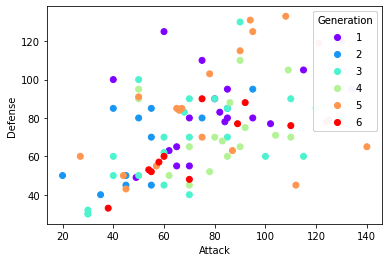

In [6]:
X = pokemon_df[['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Pr_Male']]

# Set the number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Perform k-means clustering
clusters = kmeans.fit_predict(X)

# Plot the results
fig, ax = plt.subplots()
scatter = ax.scatter(X['Attack'], X['Defense'], c=pokemon_df['Generation'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Generation")
ax.add_artist(legend1)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()




# Sikander Raja Prediction Body Style

# Data Distribution

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('pokemon_alopez247.csv')

type1_encoder = LabelEncoder()
type2_encoder = LabelEncoder()
Egg_Group_1_encoder = LabelEncoder()
Egg_Group_2_encoder = LabelEncoder()

# Fit and transform the columns with LabelEncoders
df['Type_1'] = type1_encoder.fit_transform(df['Type_1'])
df['Type_2'] = type2_encoder.fit_transform(df['Type_2'])
df['Egg_Group_1'] = Egg_Group_1_encoder.fit_transform(df['Egg_Group_1'])
df['Egg_Group_2'] = Egg_Group_2_encoder.fit_transform(df['Egg_Group_2'])

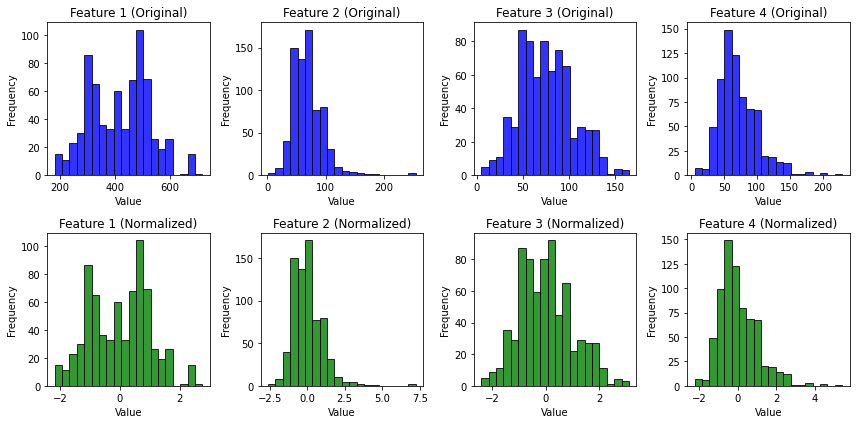

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Original data
X = df[['Total', 'HP', 'Attack', 'Defense',]].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot histograms
fig, axes = plt.subplots(2, X.shape[1], figsize=(12, 6))

for i in range(X.shape[1]):
    axes[0, i].hist(X[:, i], bins=20, alpha=0.8, color='blue', edgecolor='black')
    axes[0, i].set_title(f"Feature {i+1} (Original)")
    axes[0, i].set_xlabel("Value")
    axes[0, i].set_ylabel("Frequency")

    axes[1, i].hist(X_scaled[:, i], bins=20, alpha=0.8, color='green', edgecolor='black')
    axes[1, i].set_title(f"Feature {i+1} (Normalized)")
    axes[1, i].set_xlabel("Value")
    axes[1, i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Data Preprocessing 

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [10]:
df = pd.read_csv('pokemon_alopez247.csv')
df

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [11]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [12]:
df = pd.read_csv('pokemon_alopez247.csv')

df = pd.get_dummies(df, columns=["Type_1"])
df = pd.get_dummies(df, columns=["Type_2"])
df = pd.get_dummies(df, columns=["Egg_Group_1"])
df = pd.get_dummies(df, columns=["Egg_Group_2"])

In [13]:
df

,Number,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Egg_Group_2_Fairy,Egg_Group_2_Field,Egg_Group_2_Flying,Egg_Group_2_Grass,Egg_Group_2_Human-Like,Egg_Group_2_Mineral,Egg_Group_2_Monster,Egg_Group_2_Water_1,Egg_Group_2_Water_2,Egg_Group_2_Water_3
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,...,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,309,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Charmeleon,405,58,64,58,80,65,80,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,680,126,131,95,131,98,99,6,...,0,0,0,0,0,0,0,0,0,0
717,718,Zygarde,600,108,100,121,81,95,95,6,...,0,0,0,0,0,0,0,0,0,0
718,719,Diancie,600,50,100,150,100,150,50,6,...,0,0,0,0,0,0,0,0,0,0
719,720,Hoopa,600,80,110,60,150,130,70,6,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.columns

Index(['Number', 'Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk',
       'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color', 'hasGender',
       'Pr_Male', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style', 'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon',
       'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire',
       'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground',
       'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic',
       'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water', 'Type_2_Bug',
       'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric', 'Type_2_Fairy',
       'Type_2_Fighting', 'Type_2_Fire', 'Type_2_Flying', 'Type_2_Ghost',
       'Type_2_Grass', 'Type_2_Ground', 'Type_2_Ice', 'Type_2_Normal',
       'Type_2_Poison', 'Type_2_Psychic', 'Type_2_Rock', 'Type_2_Steel',
       'Type_2_Water', 'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Grou

# Decision Tree

In [15]:
X = df[['Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg','Catch_Rate',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon',
       'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire',
       'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground',
       'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic',
       'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water', 'Type_2_Bug',
       'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric', 'Type_2_Fairy',
       'Type_2_Fighting', 'Type_2_Fire', 'Type_2_Flying', 'Type_2_Ghost',
       'Type_2_Grass', 'Type_2_Ground', 'Type_2_Ice', 'Type_2_Normal',
       'Type_2_Poison', 'Type_2_Psychic', 'Type_2_Rock', 'Type_2_Steel',
       'Type_2_Water', 'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3', 'Egg_Group_2_Amorphous',
       'Egg_Group_2_Bug', 'Egg_Group_2_Dragon', 'Egg_Group_2_Fairy',
       'Egg_Group_2_Field', 'Egg_Group_2_Flying', 'Egg_Group_2_Grass',
       'Egg_Group_2_Human-Like', 'Egg_Group_2_Mineral', 'Egg_Group_2_Monster',
       'Egg_Group_2_Water_1', 'Egg_Group_2_Water_2', 'Egg_Group_2_Water_3']]
y = df['Body_Style']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = dt_classifier.predict(X_test)


In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
DecisionAcc = accuracy_score(y_test, y_pred)

Classification Report:
                  precision    recall  f1-score   support

  bipedal_tailed       0.42      0.55      0.48        38
bipedal_tailless       0.55      0.50      0.52        22
      four_wings       0.25      0.33      0.29         3
       head_arms       0.22      0.25      0.24         8
       head_base       0.11      0.14      0.12         7
       head_legs       0.00      0.00      0.00         4
       head_only       0.40      0.40      0.40        10
       insectoid       0.25      0.10      0.14        10
 multiple_bodies       0.20      0.14      0.17         7
       quadruped       0.59      0.53      0.56        38
 serpentine_body       0.00      0.00      0.00         6
   several_limbs       0.25      0.25      0.25         4
       two_wings       0.91      0.67      0.77        15
       with_fins       0.50      0.56      0.53         9

        accuracy                           0.43       181
       macro avg       0.33      0.32      0.32

# Support Vector Machine

In [21]:
X = df[['Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg','Catch_Rate',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon',
       'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire',
       'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground',
       'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic',
       'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water', 'Type_2_Bug',
       'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric', 'Type_2_Fairy',
       'Type_2_Fighting', 'Type_2_Fire', 'Type_2_Flying', 'Type_2_Ghost',
       'Type_2_Grass', 'Type_2_Ground', 'Type_2_Ice', 'Type_2_Normal',
       'Type_2_Poison', 'Type_2_Psychic', 'Type_2_Rock', 'Type_2_Steel',
       'Type_2_Water', 'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3', 'Egg_Group_2_Amorphous',
       'Egg_Group_2_Bug', 'Egg_Group_2_Dragon', 'Egg_Group_2_Fairy',
       'Egg_Group_2_Field', 'Egg_Group_2_Flying', 'Egg_Group_2_Grass',
       'Egg_Group_2_Human-Like', 'Egg_Group_2_Mineral', 'Egg_Group_2_Monster',
       'Egg_Group_2_Water_1', 'Egg_Group_2_Water_2', 'Egg_Group_2_Water_3']]
y = df['Body_Style']

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)


SVC()

In [25]:
y_pred = svm_classifier.predict(X_test)


In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
SVMacc = accuracy_score(y_test, y_pred)

Classification Report:
                  precision    recall  f1-score   support

  bipedal_tailed       0.40      0.59      0.48        44
bipedal_tailless       0.36      0.64      0.46        25
      four_wings       0.75      0.60      0.67         5
       head_arms       0.11      0.09      0.10        11
       head_base       0.50      0.22      0.31         9
       head_legs       0.00      0.00      0.00         5
       head_only       0.00      0.00      0.00        12
       insectoid       0.33      0.40      0.36        10
 multiple_bodies       0.00      0.00      0.00         9
       quadruped       0.66      0.72      0.69        43
 serpentine_body       0.50      0.33      0.40         6
   several_limbs       0.00      0.00      0.00         6
       two_wings       0.94      0.77      0.85        22
       with_fins       0.80      0.40      0.53        10

        accuracy                           0.49       217
       macro avg       0.38      0.34      0.35

C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-Nearest Neighbors (k-NN)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [28]:

X = df[['Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg','Catch_Rate',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon',
       'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire',
       'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground',
       'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic',
       'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water', 'Type_2_Bug',
       'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric', 'Type_2_Fairy',
       'Type_2_Fighting', 'Type_2_Fire', 'Type_2_Flying', 'Type_2_Ghost',
       'Type_2_Grass', 'Type_2_Ground', 'Type_2_Ice', 'Type_2_Normal',
       'Type_2_Poison', 'Type_2_Psychic', 'Type_2_Rock', 'Type_2_Steel',
       'Type_2_Water', 'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3', 'Egg_Group_2_Amorphous',
       'Egg_Group_2_Bug', 'Egg_Group_2_Dragon', 'Egg_Group_2_Fairy',
       'Egg_Group_2_Field', 'Egg_Group_2_Flying', 'Egg_Group_2_Grass',
       'Egg_Group_2_Human-Like', 'Egg_Group_2_Mineral', 'Egg_Group_2_Monster',
       'Egg_Group_2_Water_1', 'Egg_Group_2_Water_2', 'Egg_Group_2_Water_3']]
y = df['Body_Style']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)



In [29]:
k_values = list(range(1, 31))
cv_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


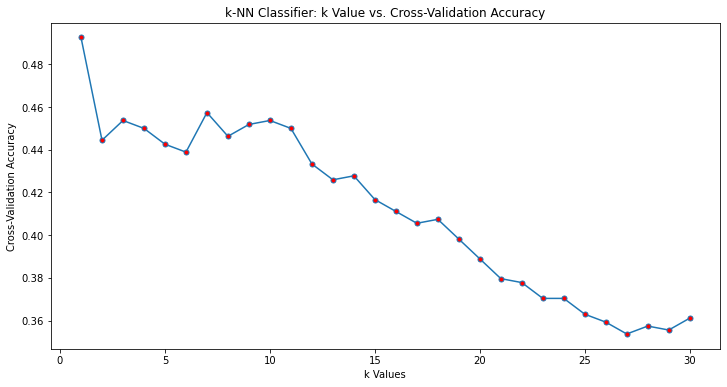

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', markerfacecolor='r', markersize=5)
plt.xlabel("k Values")
plt.ylabel("Cross-Validation Accuracy")
plt.title("k-NN Classifier: k Value vs. Cross-Validation Accuracy")
plt.show()

In [31]:
best_k = k_values[np.argmax(cv_scores)]  # You can adjust this based on your observation from the plot
knn_classifier = KNeighborsClassifier(14)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=14)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = knn_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
Kacc = accuracy_score(y_test, y_pred)

Classification Report:
                  precision    recall  f1-score   support

  bipedal_tailed       0.29      0.50      0.37        38
bipedal_tailless       0.32      0.41      0.36        22
      four_wings       0.20      0.67      0.31         3
       head_arms       0.00      0.00      0.00         8
       head_base       0.00      0.00      0.00         7
       head_legs       0.00      0.00      0.00         4
       head_only       0.00      0.00      0.00        10
       insectoid       0.67      0.20      0.31        10
 multiple_bodies       0.00      0.00      0.00         7
       quadruped       0.49      0.68      0.57        38
 serpentine_body       0.00      0.00      0.00         6
   several_limbs       0.00      0.00      0.00         4
       two_wings       0.88      0.47      0.61        15
       with_fins       1.00      0.44      0.62         9

        accuracy                           0.38       181
       macro avg       0.27      0.24      0.22

C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest 

In [33]:
X = df[['Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg','Catch_Rate',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon',
       'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire',
       'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground',
       'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic',
       'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water', 'Type_2_Bug',
       'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric', 'Type_2_Fairy',
       'Type_2_Fighting', 'Type_2_Fire', 'Type_2_Flying', 'Type_2_Ghost',
       'Type_2_Grass', 'Type_2_Ground', 'Type_2_Ice', 'Type_2_Normal',
       'Type_2_Poison', 'Type_2_Psychic', 'Type_2_Rock', 'Type_2_Steel',
       'Type_2_Water', 'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3', 'Egg_Group_2_Amorphous',
       'Egg_Group_2_Bug', 'Egg_Group_2_Dragon', 'Egg_Group_2_Fairy',
       'Egg_Group_2_Field', 'Egg_Group_2_Flying', 'Egg_Group_2_Grass',
       'Egg_Group_2_Human-Like', 'Egg_Group_2_Mineral', 'Egg_Group_2_Monster',
       'Egg_Group_2_Water_1', 'Egg_Group_2_Water_2', 'Egg_Group_2_Water_3']]
y = df['Body_Style']

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [36]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
y_pred = rf_classifier.predict(X_test)


In [38]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
RandomAcc = accuracy_score(y_test, y_pred)

Classification Report:
                  precision    recall  f1-score   support

  bipedal_tailed       0.39      0.50      0.44        44
bipedal_tailless       0.27      0.52      0.36        25
      four_wings       0.60      0.60      0.60         5
       head_arms       0.20      0.18      0.19        11
       head_base       0.00      0.00      0.00         9
       head_legs       0.33      0.20      0.25         5
       head_only       0.33      0.25      0.29        12
       insectoid       0.50      0.50      0.50        10
 multiple_bodies       0.00      0.00      0.00         9
       quadruped       0.56      0.58      0.57        43
 serpentine_body       0.00      0.00      0.00         6
   several_limbs       0.00      0.00      0.00         6
       two_wings       0.90      0.82      0.86        22
       with_fins       1.00      0.40      0.57        10

        accuracy                           0.44       217
       macro avg       0.36      0.33      0.33

C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\inwoo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Deep Learning (neural Network)

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [40]:
df = pd.read_csv('pokemon_alopez247.csv')

df = pd.get_dummies(df, columns=["Type_1"])
df = pd.get_dummies(df, columns=["Type_2"])
df = pd.get_dummies(df, columns=["Egg_Group_1"])
df = pd.get_dummies(df, columns=["Egg_Group_2"])

X = df[['Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg','Catch_Rate',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon',
       'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire',
       'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground',
       'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic',
       'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water', 'Type_2_Bug',
       'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric', 'Type_2_Fairy',
       'Type_2_Fighting', 'Type_2_Fire', 'Type_2_Flying', 'Type_2_Ghost',
       'Type_2_Grass', 'Type_2_Ground', 'Type_2_Ice', 'Type_2_Normal',
       'Type_2_Poison', 'Type_2_Psychic', 'Type_2_Rock', 'Type_2_Steel',
       'Type_2_Water', 'Egg_Group_1_Amorphous', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3', 'Egg_Group_2_Amorphous',
       'Egg_Group_2_Bug', 'Egg_Group_2_Dragon', 'Egg_Group_2_Fairy',
       'Egg_Group_2_Field', 'Egg_Group_2_Flying', 'Egg_Group_2_Grass',
       'Egg_Group_2_Human-Like', 'Egg_Group_2_Mineral', 'Egg_Group_2_Monster',
       'Egg_Group_2_Water_1', 'Egg_Group_2_Water_2', 'Egg_Group_2_Water_3']]
y = df['Body_Style']
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)


In [43]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 2.7618 - accuracy: 0.0694
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 2.3966 - accuracy: 0.2321
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 2.1804 - accuracy: 0.3254
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 1.9905 - accuracy: 0.4048
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 1.8138 - accuracy: 0.4782
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 1.6532 - accuracy: 0.5317
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 1.5115 - accuracy: 0.5496
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 1.3926 - accuracy: 0.5754
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 1.2973 - accuracy: 0.6171
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 1.2145 - accuracy: 0.6488
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9901
Epoch 84/100
16/16 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.9841
Epoch 85/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9841
Epoch 86/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9861
Epoch 87/100
16/16 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9881
Epoch 88/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9861
Epoch 89/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9921
Epoch 90/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0939 - accuracy: 0.9901
Epoch 91/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9802
Epoch 92/100
16/16 [==============================] - 0s 1ms/step - loss: 0.0953 - accuracy: 0.9841
Epoch 93/100


In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {:.2f}%".format(accuracy * 100))
DeepAcc = (accuracy)

Accuracy: 52.07%


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess your dataset
# ...

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the preprocessed dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create classifiers
knn_clf = KNeighborsClassifier()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('svc', svm_clf),
                ('dt', dt_clf), ('rf', rf_clf)],
    voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Hardvote = accuracy
print(f"Voting Classifier accuracy: {accuracy:.4f}")


Voting Classifier accuracy: 0.4378


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess your dataset
# ...


# Use the preprocessed dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create classifiers
knn_clf = KNeighborsClassifier()
svm_clf = SVC(probability=True)  # Enable probability estimation for SVM
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# Create Voting Classifier with soft-voting
voting_clf = VotingClassifier(
    estimators=[ ('knn', knn_clf), ('svc', svm_clf),
                ('dt', dt_clf), ('rf', rf_clf)],
    voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
Softvote = accuracy
print(f"Soft-voting ensemble accuracy: {accuracy:.4f}")


Soft-voting ensemble accuracy: 0.4516


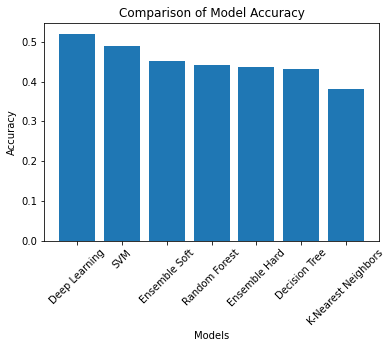

In [80]:
import matplotlib.pyplot as plt

# Store the model names and their corresponding accuracy scores
models = ['Deep Learning', 'SVM','Ensemble Soft','Random Forest','Ensemble Hard','Decision Tree','K-Nearest Neighbors']
accuracy = [DeepAcc, SVMacc, Softvote ,RandomAcc, Hardvote, DecisionAcc,Kacc]

# Create the bar graph
plt.bar(models, accuracy)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [81]:
print("Deep Learning  = ",DeepAcc)
print("Support Vector Machine = ",SVMacc)
print("Ensemble Soft Voting",Softvote)
print("Random Forest  = ",RandomAcc)
print("Ensemble Hard Voting",Hardvote)
print("Decision Tree  = ",DecisionAcc)
print("K nearest  = ",Kacc)

Deep Learning  =  0.52073734998703
Support Vector Machine =  0.48847926267281105
Ensemble Soft Voting 0.45161290322580644
Random Forest  =  0.4423963133640553
Ensemble Hard Voting 0.4377880184331797
Decision Tree  =  0.430939226519337
K nearest  =  0.3812154696132597


# Lukes part

In [11]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns

# Predicting Type

# Preprocessing/Cleaning dataset

In [12]:
data = pd.read_csv('pokemon_alopez247.csv', index_col = 'Number')
data.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [13]:
data.shape

(721, 22)

In [14]:
data['Type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [15]:
data['Type_2'].unique()

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [16]:
data['Color'].unique()

array(['Green', 'Red', 'Blue', 'White', 'Brown', 'Yellow', 'Purple',
       'Pink', 'Grey', 'Black'], dtype=object)

In [17]:
data['Body_Style'].unique()

array(['quadruped', 'bipedal_tailed', 'insectoid', 'serpentine_body',
       'four_wings', 'two_wings', 'bipedal_tailless', 'head_legs',
       'head_base', 'multiple_bodies', 'several_limbs', 'head_arms',
       'with_fins', 'head_only'], dtype=object)

In [18]:
#Removing pokemon with secondary types

df = data[data['Type_2'].isna()]
df = df.drop(['Type_2'], axis=1)
df = df.reset_index()
df = df.drop(['Number'], axis=1)
df

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Charmander,Fire,309,39,52,43,60,50,65,1,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
1,Charmeleon,Fire,405,58,64,58,80,65,80,1,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
2,Squirtle,Water,314,44,48,65,50,64,43,1,...,Blue,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed
3,Wartortle,Water,405,59,63,80,65,80,58,1,...,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
4,Blastoise,Water,530,79,83,100,85,105,78,1,...,Blue,True,0.875,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Sliggoo,Dragon,452,68,75,53,83,113,60,6,...,Purple,True,0.500,Dragon,NaN,False,0.79,17.5,45,serpentine_body
367,Goodra,Dragon,600,90,100,70,110,150,80,6,...,Purple,True,0.500,Dragon,NaN,False,2.01,150.5,45,bipedal_tailed
368,Bergmite,Ice,304,55,69,85,32,35,28,6,...,Blue,True,0.500,Monster,NaN,False,0.99,99.5,190,quadruped
369,Avalugg,Ice,514,95,117,184,44,46,28,6,...,Blue,True,0.500,Monster,NaN,False,2.01,505.0,55,quadruped


We have some categorical variables in this dataset that we will want to use in our models. For example, color and body style can potentially be very significant predictors for a pokemon's type. To treat these values properly, we should create dummies to make sure that no color/body type has a stronger weight or imply any ordering. This should also hopefully make the model more accurate. 

In [19]:
df = pd.get_dummies(df, columns=["Color"])
df

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color_Black,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow
0,Charmander,Fire,309,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,1,0,0
1,Charmeleon,Fire,405,58,64,58,80,65,80,1,...,0,0,0,0,0,0,0,1,0,0
2,Squirtle,Water,314,44,48,65,50,64,43,1,...,0,1,0,0,0,0,0,0,0,0
3,Wartortle,Water,405,59,63,80,65,80,58,1,...,0,1,0,0,0,0,0,0,0,0
4,Blastoise,Water,530,79,83,100,85,105,78,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Sliggoo,Dragon,452,68,75,53,83,113,60,6,...,0,0,0,0,0,0,1,0,0,0
367,Goodra,Dragon,600,90,100,70,110,150,80,6,...,0,0,0,0,0,0,1,0,0,0
368,Bergmite,Ice,304,55,69,85,32,35,28,6,...,0,1,0,0,0,0,0,0,0,0
369,Avalugg,Ice,514,95,117,184,44,46,28,6,...,0,1,0,0,0,0,0,0,0,0


In [20]:
df = pd.get_dummies(df, columns=["Body_Style"])
df

,Name,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Body_Style_head_arms,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_with_fins
0,Charmander,Fire,309,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,0,0,0
1,Charmeleon,Fire,405,58,64,58,80,65,80,1,...,0,0,0,0,0,0,0,0,0,0
2,Squirtle,Water,314,44,48,65,50,64,43,1,...,0,0,0,0,0,0,0,0,0,0
3,Wartortle,Water,405,59,63,80,65,80,58,1,...,0,0,0,0,0,0,0,0,0,0
4,Blastoise,Water,530,79,83,100,85,105,78,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,Sliggoo,Dragon,452,68,75,53,83,113,60,6,...,0,0,0,0,0,0,0,1,0,0
367,Goodra,Dragon,600,90,100,70,110,150,80,6,...,0,0,0,0,0,0,0,0,0,0
368,Bergmite,Ice,304,55,69,85,32,35,28,6,...,0,0,0,0,0,0,1,0,0,0
369,Avalugg,Ice,514,95,117,184,44,46,28,6,...,0,0,0,0,0,0,1,0,0,0


The next step in cleaning up the data is determining what columns we need to remove, we can remove 'Type_2' because at this point, there are no more pokemon with a second type. 'Type_1' we can remove since that is going to be our predictor for classification. 'Name' we can also remove since every pokemon has a unique name meaning it would provide no use in the model. 'Egg_Group_1' and 'Egg_Group_2' should be removed as well since they give away the type that a pokemon has, basically defeating the purpose of predicting. Removing 'hasMegaEvolution' was decided because of prior feature significance testing, it ultimately made little difference in accuracy increasing. 'Pr_Male' was removed for similar reasons as well, 'hasGender' ended up being a better feature. Finally, 'Total' was dropped because of these past two reasons, little significance in the accuracy and also was redundant because its a sum of all of a pokemon's stats, the individual stats are more important.

In [21]:
#Add our y before removing type 1
y = df.Type_1

#Drop columns that are redundant/insignificant
df = df.drop([ 'Total', 'Type_1', 'Name', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Pr_Male' ],  axis = 1)

df

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Height_m,...,Body_Style_head_arms,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_with_fins
0,39,52,43,60,50,65,1,False,True,0.61,...,0,0,0,0,0,0,0,0,0,0
1,58,64,58,80,65,80,1,False,True,1.09,...,0,0,0,0,0,0,0,0,0,0
2,44,48,65,50,64,43,1,False,True,0.51,...,0,0,0,0,0,0,0,0,0,0
3,59,63,80,65,80,58,1,False,True,0.99,...,0,0,0,0,0,0,0,0,0,0
4,79,83,100,85,105,78,1,False,True,1.60,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,68,75,53,83,113,60,6,False,True,0.79,...,0,0,0,0,0,0,0,1,0,0
367,90,100,70,110,150,80,6,False,True,2.01,...,0,0,0,0,0,0,0,0,0,0
368,55,69,85,32,35,28,6,False,True,0.99,...,0,0,0,0,0,0,1,0,0,0
369,95,117,184,44,46,28,6,False,True,2.01,...,0,0,0,0,0,0,1,0,0,0


In [22]:
df.skew()

HP                              2.262648
Attack                          0.416487
Defense                         1.079006
Sp_Atk                          0.524805
Sp_Def                          0.991023
Speed                           0.367791
Generation                      0.032800
isLegendary                     4.088439
hasGender                      -2.899653
Height_m                        7.714603
Weight_kg                       5.479291
Catch_Rate                      0.613710
Color_Black                     4.361795
Color_Blue                      1.620650
Color_Brown                     1.957997
Color_Green                     2.633113
Color_Grey                      2.959545
Color_Pink                      3.227349
Color_Purple                    2.842168
Color_Red                       2.733751
Color_White                     3.381862
Color_Yellow                    2.786919
Body_Style_bipedal_tailed       1.012282
Body_Style_bipedal_tailless     1.872314
Body_Style_four_

As you can see a lot of our model is skewed positively, we need to deal with this. Because there is so many features, it would be very messy to display so I showed this instead. We need to standardize using the standard scaler which gives a mean of zero and standard deviation of 1. We then use the min max scaler to make sure our features are not negative valued. 

##  Classifier Comparison/Analysis

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifiers = []

X = preprocessing.scale(df, axis=0)  # standardize (zero mean, sd=1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('tr', tree_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard') # hard voting
voting_clf.fit(X_train, y_train)


#Displaying hard voting as well as logistic regression, random forest and SVM

from sklearn.metrics import accuracy_score

for clf in (tree_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classifiers.append(accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
classifiers.append(accuracy_score(y_test, y_pred))
print("AdaBoost ", accuracy_score(y_test, y_pred))

# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
classifiers.append(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score
print("Bagging ", accuracy_score(y_test, y_pred))



DecisionTreeClassifier 0.34408602150537637
RandomForestClassifier 0.4946236559139785
SVC 0.46236559139784944
VotingClassifier 0.5053763440860215
AdaBoost  0.3225806451612903
Bagging  0.45161290322580644


In [24]:
list(df.columns)

['HP',
 'Attack',
 'Defense',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Generation',
 'isLegendary',
 'hasGender',
 'Height_m',
 'Weight_kg',
 'Catch_Rate',
 'Color_Black',
 'Color_Blue',
 'Color_Brown',
 'Color_Green',
 'Color_Grey',
 'Color_Pink',
 'Color_Purple',
 'Color_Red',
 'Color_White',
 'Color_Yellow',
 'Body_Style_bipedal_tailed',
 'Body_Style_bipedal_tailless',
 'Body_Style_four_wings',
 'Body_Style_head_arms',
 'Body_Style_head_base',
 'Body_Style_head_legs',
 'Body_Style_head_only',
 'Body_Style_insectoid',
 'Body_Style_multiple_bodies',
 'Body_Style_quadruped',
 'Body_Style_serpentine_body',
 'Body_Style_several_limbs',
 'Body_Style_with_fins']

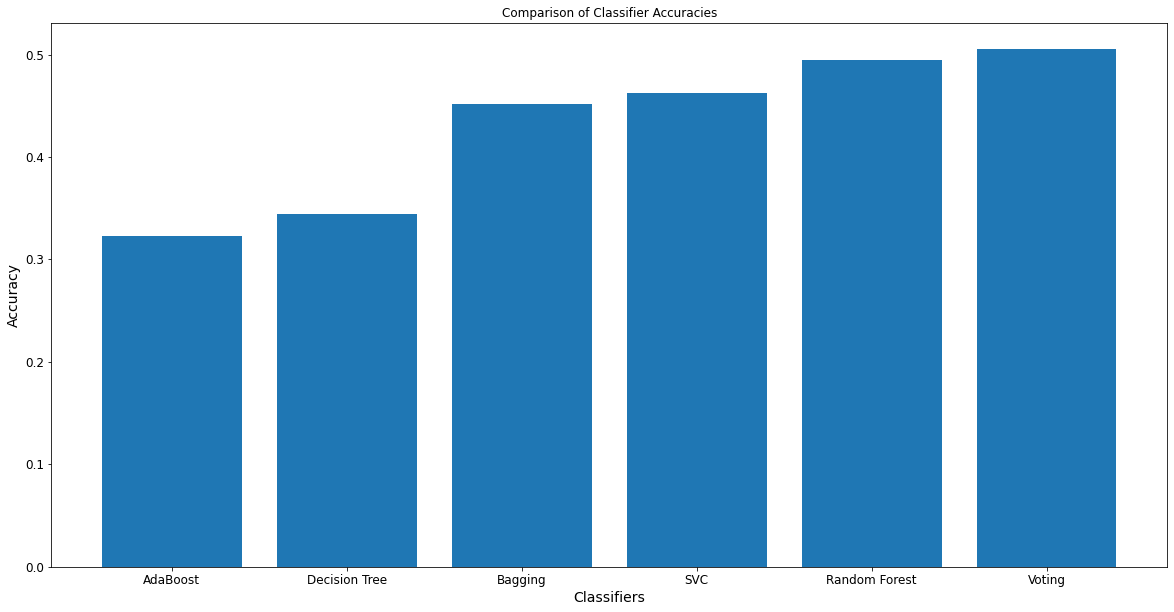

In [25]:


np.sort(classifiers)
plt.rcParams["figure.figsize"] = (20,10)
mpl.pyplot.bar(x = ['AdaBoost', 'Decision Tree',  'Bagging', 'SVC', 'Random Forest', 'Voting'], 
               height = np.sort(classifiers))

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')

plt.show()

Ultimately, our accuracy wasn't very high on any of the classification models. HOWEVER, this does not mean the model is a weak learner, there is a 1/18 chance that a person could randomly guess if a pokemon is the correct type. If classification is able to get around 50% of pokemon to have the right type, that is great. 

We can compare our different classification methods between each other. AdaBoost was the weakest accuracy out of all the models and voting was the best. Hard voting ended up going above all the individual classifier votes that was def into it. Soft voting would probably be even better to use since it takes into consideration how important/significant a classifier might be, holding more weight on certain classifiers. Decision tree was also weak, not being as strong as random forest machines which is expected. Bagging didn't do too bad but it was pretty middle of the road in accuracy out of all the classification models. Random Forest was a great model as well. In the end I would use either random forests or voting to predict type, there is many parameters to optimize between these two to potentially bring up accuracy a bit more.

# Predicting Legendary

## Preprocessing/Cleaning Dataset

In [26]:
data

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms


In [27]:
df = data

df['Pr_Male'] = df['Pr_Male'].fillna(value=0)

In [28]:
df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,...,Red,False,0.000,Undiscovered,NaN,False,5.79,203.0,45,two_wings
718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,...,Green,False,0.000,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,...,Pink,False,0.000,Undiscovered,NaN,True,0.71,8.8,3,head_arms


In [29]:

# Through multiple tests and checking feature importance, these columns were found to be insignificant so they were dropped

df = df.drop(['HP', 'Pr_Male', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'hasMegaEvolution', 'Color', 'Type_1', 'Type_2', 'Generation',
              'Body_Style', 'isLegendary', 'Name', 'Egg_Group_1', 'Egg_Group_2', ],  axis = 1)
df = df.reset_index()
df = df.drop(['Number'], axis=1)
df



,Total,hasGender,Height_m,Weight_kg,Catch_Rate
0,318,True,0.71,6.9,45
1,405,True,0.99,13.0,45
2,525,True,2.01,100.0,45
3,309,True,0.61,8.5,45
4,405,True,1.09,19.0,45
...,...,...,...,...,...
716,680,False,5.79,203.0,45
717,600,False,5.00,305.0,3
718,600,False,0.71,8.8,3
719,600,False,0.51,9.0,3


In [30]:
df.skew() #This is used to check the skew of our features to make sure if they are normally distributed or not

Total         0.061650
hasGender    -2.551525
Height_m      5.508668
Weight_kg     4.008668
Catch_Rate    0.802808
dtype: float64

As you can see, our features are not normally distributed, our total feature is the only one that is not affected by skew. Positive values represent a right skew (positive) and a negative value is left skew. We need to normalize/standardize this data by using the minmax scaler function

(array([ 26.,  53., 151.,  69.,  93., 172.,  95.,  45.,   1.,  16.]),
 array([180., 234., 288., 342., 396., 450., 504., 558., 612., 666., 720.]),
 <BarContainer object of 10 artists>)

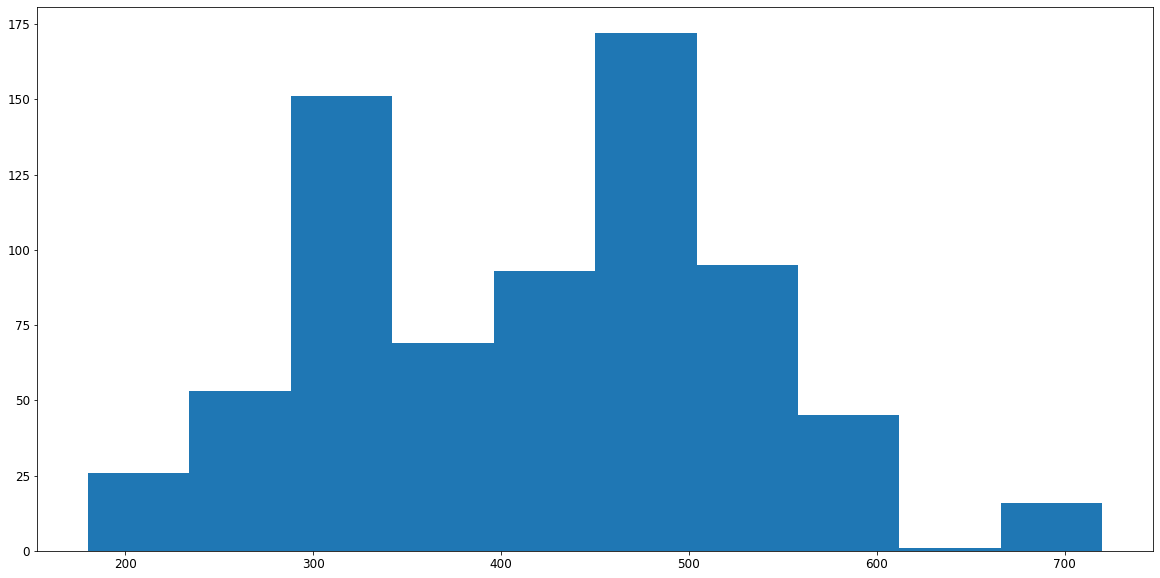

In [31]:
plt.rcParams["figure.figsize"] = (20,10)
mpl.pyplot.hist(df.Total)

(array([582., 116.,  11.,   5.,   4.,   0.,   2.,   0.,   0.,   1.]),
 array([ 0.1 ,  1.54,  2.98,  4.42,  5.86,  7.3 ,  8.74, 10.18, 11.62,
        13.06, 14.5 ]),
 <BarContainer object of 10 artists>)

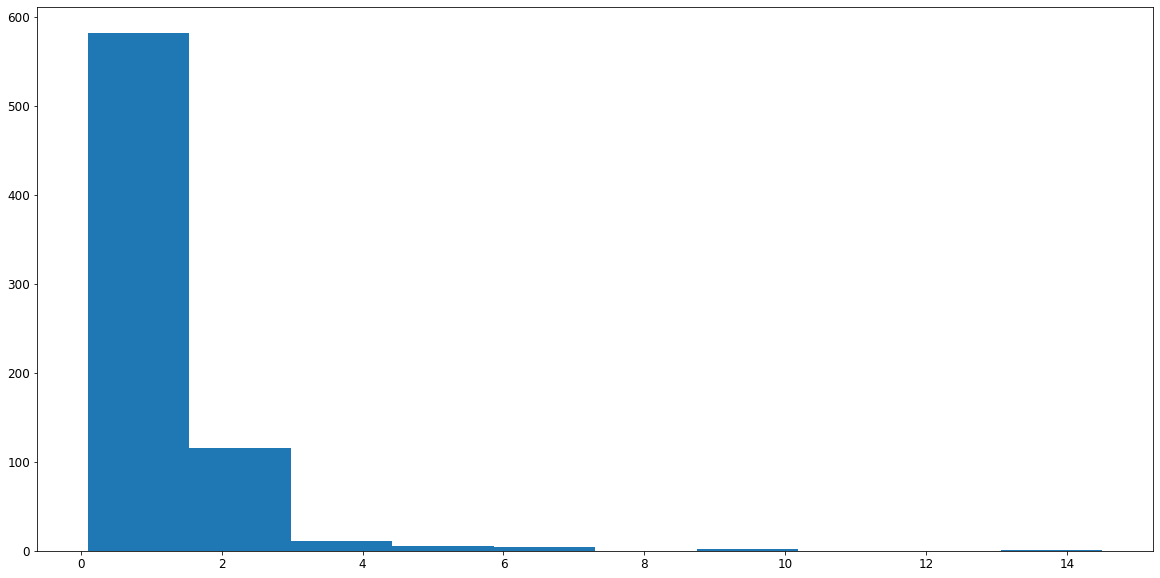

In [32]:
plt.rcParams["figure.figsize"] = (20,10)
mpl.pyplot.hist(df.Height_m)

##  Classifier Comparison/Analysis

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Standardizing our model and normalizing distributions for better accuracy
dfNew = preprocessing.scale(df, axis=0)

scaler = MinMaxScaler()
scaler.fit(dfNew)
dfNew = scaler.transform(dfNew)

dfNew


array([[0.25555556, 1.        , 0.04236111, 0.00715865, 0.16666667],
       [0.41666667, 1.        , 0.06180556, 0.01358038, 0.16666667],
       [0.63888889, 1.        , 0.13263889, 0.10516897, 0.16666667],
       ...,
       [0.77777778, 0.        , 0.04236111, 0.00915886, 0.        ],
       [0.77777778, 0.        , 0.02847222, 0.00936941, 0.        ],
       [0.77777778, 0.        , 0.11111111, 0.20517949, 0.        ]])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifiers = []



 # standardize (zero mean, sd=1) THIS will make sure weights are equal and have a range from 0,1
print()
y = data.isLegendary

X_train, X_test, y_train, y_test = train_test_split(dfNew, y, random_state=42)

#Chose newton-cg for one-hot encoded categorical features and larger samples
log_clf = LogisticRegression(solver="newton-cg", random_state=42, max_iter=1000)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard') # hard voting
voting_clf.fit(X_train, y_train)




from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    classifiers.append(accuracy_score(y_test, y_pred))
    print("Test: ", clf.__class__.__name__, accuracy_score(y_test, y_pred))
    y_pred = clf.predict(X_train)
    print("Train: ", clf.__class__.__name__, accuracy_score(y_train, y_pred))
    print("")

    
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state =42), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
classifiers.append(accuracy_score(y_test, y_pred))
print("Test: AdaBoost ",accuracy_score(y_test, y_pred))
y_pred = ada_clf.predict(X_train)
print("Train: AdaBoost ",accuracy_score(y_train, y_pred))
print("")

# Bagging
from sklearn.ensemble import BaggingClassifier


bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=1000,
    max_samples=300, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
classifiers.append(accuracy_score(y_test, y_pred))
print("Test: Bagging ", accuracy_score(y_test, y_pred ))
y_pred = bag_clf.predict(X_train)
print("Train: Bagging ", accuracy_score(y_train, y_pred ))
print("")


# Single Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
classifiers.append(accuracy_score(y_test, y_pred_tree))
print("Test: Decision Tree ", accuracy_score(y_test, y_pred_tree))
y_pred_tree = tree_clf.predict(X_train)
print("Train: Decision Tree ", accuracy_score(y_train, y_pred_tree))
print("")



Test:  LogisticRegression 0.988950276243094
Train:  LogisticRegression 0.9814814814814815

Test:  RandomForestClassifier 1.0
Train:  RandomForestClassifier 1.0

Test:  SVC 0.9779005524861878
Train:  SVC 0.9796296296296296

Test:  VotingClassifier 0.988950276243094
Train:  VotingClassifier 0.9833333333333333

Test: AdaBoost  1.0
Train: AdaBoost  1.0

Test: Bagging  1.0
Train: Bagging  0.9944444444444445

Test: Decision Tree  1.0
Train: Decision Tree  1.0



In [35]:
names = []
scores = []

#Feature Importances

for name, score in zip(df.columns, rnd_clf.feature_importances_):
    names.append(name)
    scores.append(score)
    print(name, score)



Total 0.333099663856511
hasGender 0.11215747318963187
Height_m 0.10058548808484755
Weight_kg 0.1175746508579335
Catch_Rate 0.33658272401107614


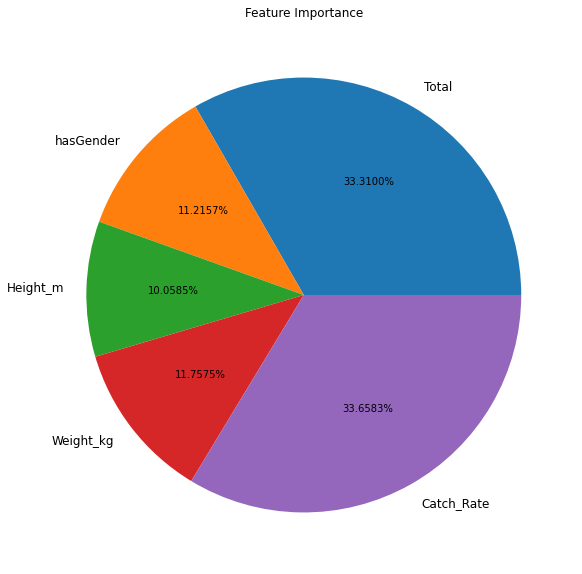

In [36]:
def my_fmt(x):
    return '{:.4f}%'.format(x)

plt.rcParams["figure.figsize"] = (20,10)
mpl.pyplot.pie(x = scores, labels = names, autopct = my_fmt) 
               

plt.title('Feature Importance')

plt.show()

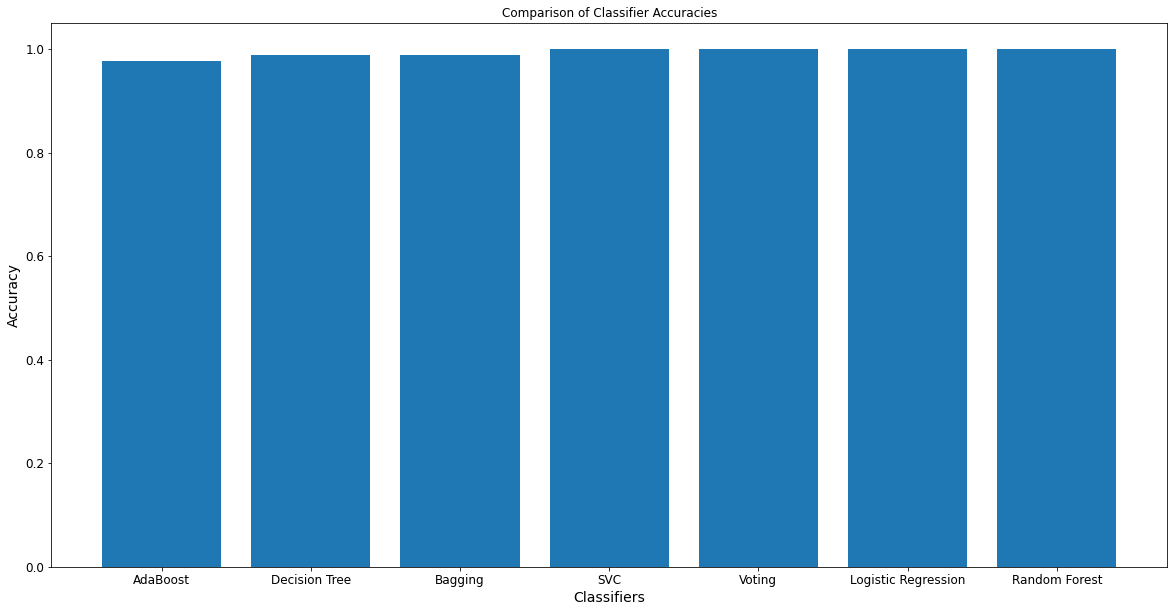

In [37]:


np.sort(classifiers)
plt.rcParams["figure.figsize"] = (20,10)
mpl.pyplot.bar(x = ['AdaBoost', 'Decision Tree', 'Bagging', 'SVC', 'Voting', 'Logistic Regression', 'Random Forest'], 
               height = np.sort(classifiers))

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')

plt.show()

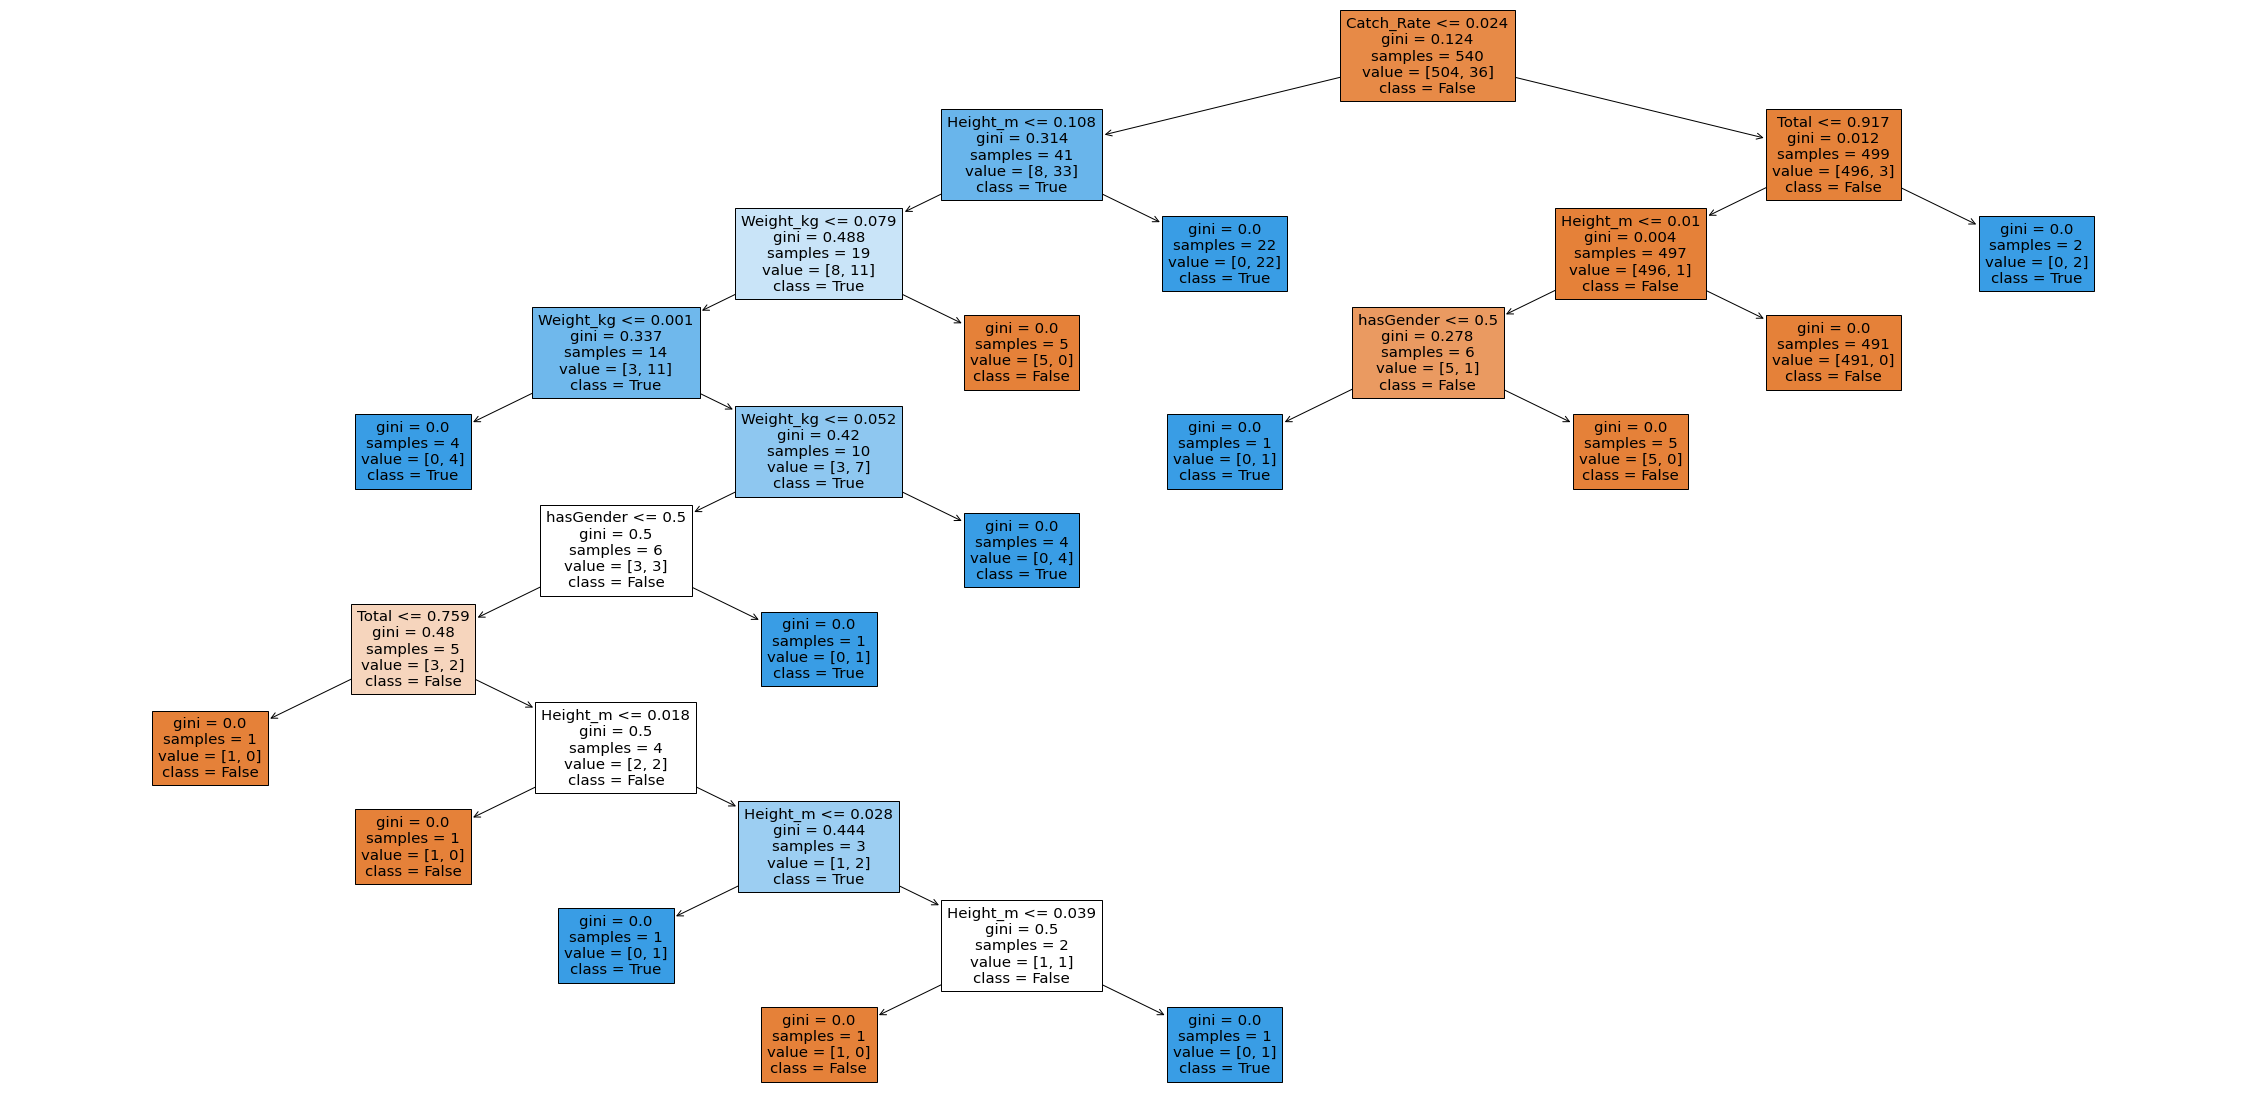

In [38]:
from sklearn import tree

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(tree_clf,feature_names = list(df.columns) ,class_names=('False', 'True'), filled=True)

# Max Part

In [42]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [43]:
df = pd.read_csv('pokemon_alopez247.csv')

# Data Preparation

In [44]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [46]:
df['Pr_Male'] = df['Pr_Male'].fillna(0)

In [47]:
df['isLegendary'] = df['isLegendary'].astype(int)

# EDA

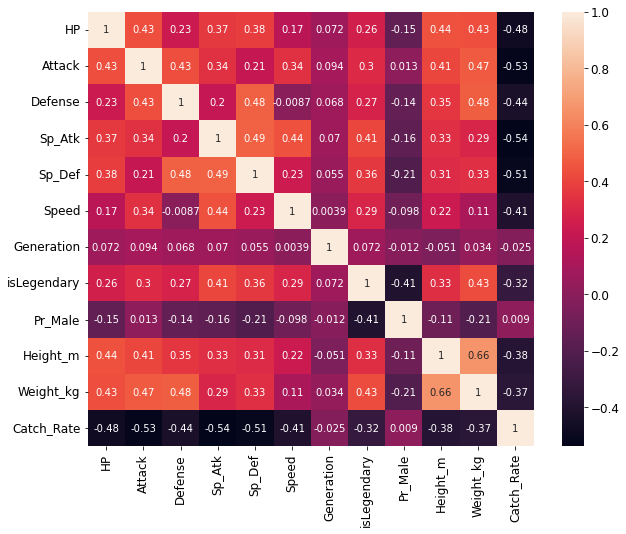

In [48]:
# CORRELATION MATRIX
cormax_df = df.drop(['Total','Number','Name','Type_1','Type_2','Color','hasGender','Egg_Group_1','Egg_Group_2','hasMegaEvolution','Body_Style'],axis=1)
corrMatrix = cormax_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Predictors and Target

In [49]:
x = df.drop(['Catch_Rate', 'Total','Number','Name','Type_1','Type_2','Color','hasGender','Egg_Group_1','Egg_Group_2','hasMegaEvolution','Body_Style'],axis=1)
y = df.Catch_Rate

# Standardization

In [50]:
from sklearn.preprocessing import MinMaxScaler
Mm_X = MinMaxScaler()

X = Mm_X.fit_transform(x)

# Splitting the data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.30)

# Multiple Linear Regression using sklearn

In [52]:
reg1 = linear_model.LinearRegression()
reg1.fit(X_train,y_train)
y_pred = reg1.predict(X_test)

print("R squared: {}".format(r2_score(y_test,y_pred)))# R squared

R squared: 0.48517891837149585


In [53]:
x.columns

Index(['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'isLegendary', 'Pr_Male', 'Height_m', 'Weight_kg'],
      dtype='object')

# Distribution of Catch Rate

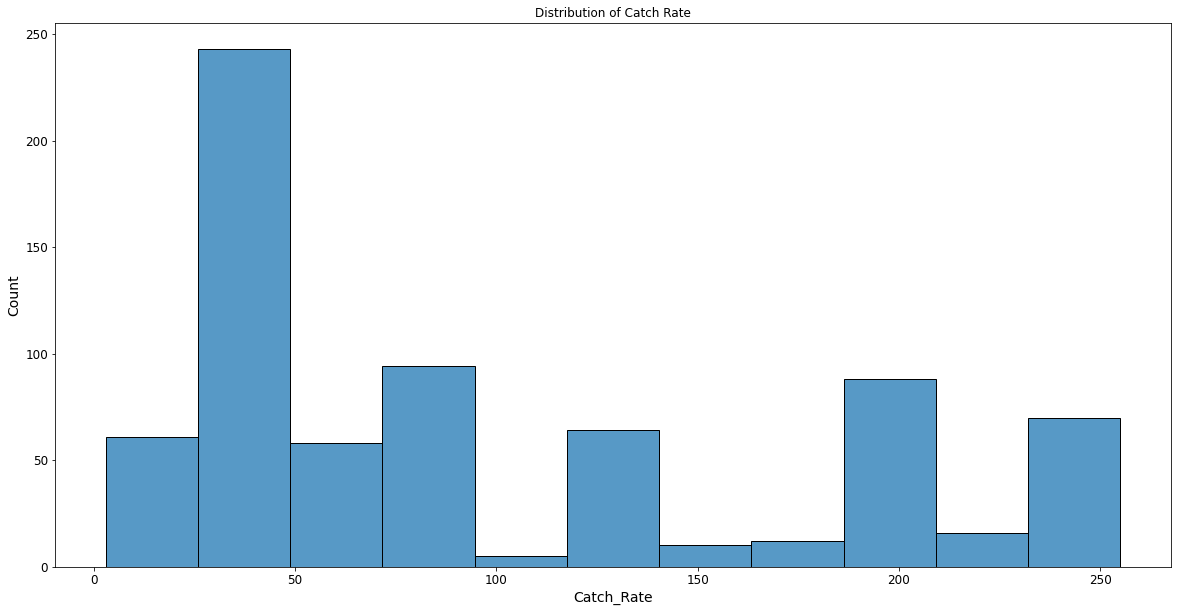

In [54]:
sns.histplot(x='Catch_Rate', data = df).set(title='Distribution of Catch Rate'); #Checking distribution of Catch Rate

# Multiple Linear Regression using linear model

In [55]:
lm = smf.ols(formula='Catch_Rate ~ HP + Attack + Defense + Sp_Atk + Sp_Def + Speed + Generation + Height_m + Weight_kg + Pr_Male', data =df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Catch_Rate   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.27
Date:                Mon, 08 May 2023   Prob (F-statistic):          2.91e-121
Time:                        23:24:23   Log-Likelihood:                -3850.2
No. Observations:                 721   AIC:                             7722.
Df Residuals:                     710   BIC:                             7773.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    340.1132     10.181     33.405      0.0

In [56]:
lm = smf.ols(formula='Catch_Rate ~ HP + Attack + Defense + Sp_Atk  + Speed + Pr_Male', data =df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Catch_Rate   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 08 May 2023   Prob (F-statistic):          1.54e-118
Time:                        23:24:23   Log-Likelihood:                -3866.5
No. Observations:                 721   AIC:                             7747.
Df Residuals:                     714   BIC:                             7779.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    337.6966      9.441     35.769      0.0

# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

reg2 = RandomForestRegressor(max_depth=10, random_state=42, n_estimators=1000)
reg2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

In [58]:
print('The RF Regressor yields an R-squared of:', reg2.score(X_test,y_test))

The RF Regressor yields an R-squared of: 0.6087395751570979


[Text(0.5266586317722681, 0.9545454545454546, 'X[0] <= 0.246\nsquared_error = 5127.77\nsamples = 314\nvalue = 93.667'),
 Text(0.3111799816345271, 0.8636363636363636, 'X[8] <= 0.812\nsquared_error = 6125.304\nsamples = 143\nvalue = 134.991'),
 Text(0.20730027548209368, 0.7727272727272727, 'X[4] <= 0.236\nsquared_error = 5598.625\nsamples = 118\nvalue = 153.89'),
 Text(0.1382001836547291, 0.6818181818181818, 'X[10] <= 0.098\nsquared_error = 4412.217\nsamples = 86\nvalue = 179.472'),
 Text(0.10009182736455463, 0.5909090909090909, 'X[0] <= 0.156\nsquared_error = 3649.234\nsamples = 84\nvalue = 185.375'),
 Text(0.04591368227731864, 0.5, 'X[3] <= 0.226\nsquared_error = 1429.529\nsamples = 26\nvalue = 220.349'),
 Text(0.014692378328741965, 0.4090909090909091, 'X[2] <= 0.056\nsquared_error = 606.994\nsamples = 15\nvalue = 243.696'),
 Text(0.0073461891643709825, 0.3181818181818182, 'squared_error = 0.0\nsamples = 1\nvalue = 190.0'),
 Text(0.02203856749311295, 0.3181818181818182, 'X[1] <= 0.484\

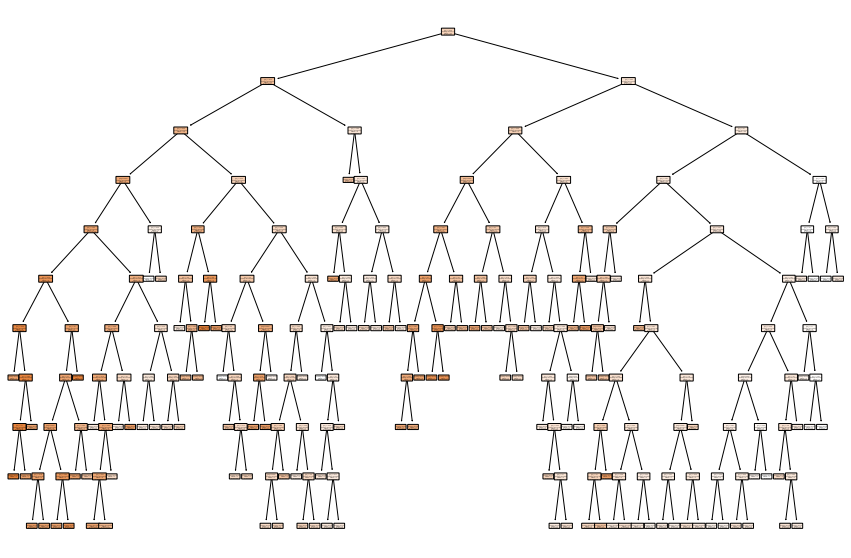

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(reg2.estimators_[0], 
          feature_names=X.dtype.names,
          class_names=y.dtype.names, 
          filled=True, impurity=True, 
          rounded=True)

# Gradient Boosting Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

reg3 = GradientBoostingRegressor(random_state=42)
reg3.fit(X_train, y_train)
GradientBoostingRegressor(random_state=42)

print('The R-squared for Gradiant Boosting Regressor is:',reg3.score(X_test, y_test))

The R-squared for Gradiant Boosting Regressor is: 0.5599202137114446


# Voting Regressor

In [61]:
from sklearn.ensemble import VotingRegressor

ereg = VotingRegressor(estimators=[("lr", reg1), ("rf", reg2), ("gb", reg3)])
ereg.fit(X_train, y_train)

print('The R-squared for Gradiant Boosting Regressor is:',ereg.score(X_test, y_test))

The R-squared for Gradiant Boosting Regressor is: 0.601151490870044


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.02)

In [63]:
xt = X_test

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

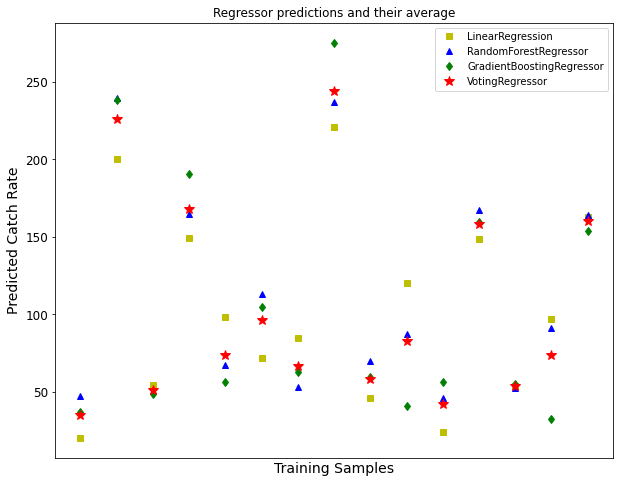

In [64]:
plt.figure(figsize=(10,8))
plt.plot(pred1, "ys", label="LinearRegression")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "gd", label="GradientBoostingRegressor")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted Catch Rate")
plt.xlabel("Training Samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

# Plotting difference in models

In [65]:
plot_data = [['Linear_model',.545],['Gradien_Boosting',.584],['Random_Forest',.607],['Voting_Regressor',.608]]

df2 = pd.DataFrame(plot_data, columns=['Model', 'Score'])

df2

,Model,Score
0,Linear_model,0.545
1,Gradien_Boosting,0.584
2,Random_Forest,0.607
3,Voting_Regressor,0.608


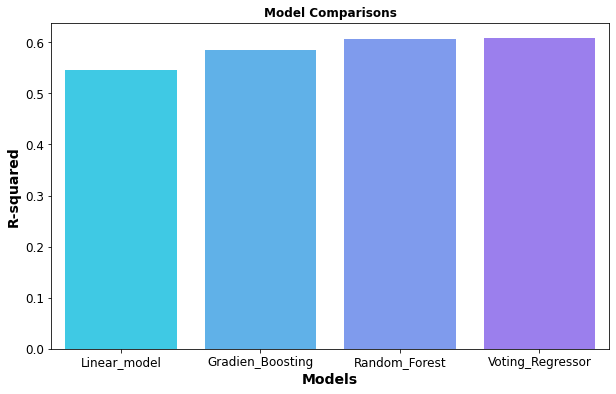

In [66]:
# Set the color palette
sns.set_palette('cool')

# Set the figure size
plt.figure(figsize=(10, 6))

sns.barplot(data=df2, x='Model',y='Score')

ax = plt.gca()


# Set the x and y axis labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R-squared', fontweight='bold')

# Set the title
plt.title('Model Comparisons', fontweight='bold')

# Show the plot
plt.show()